### Codio Activity 10.2: Computing Autocorrelation


**Expected Time: 45 Minutes**

**Total Points: 50**


This activity focuses on computing the autocorrelation of a time series dataset.  You will use `statsmodels` to compute autocorrelation and determine whether or not the series is stationary.  Finally, you are to difference the data and see if the resulting series is itself stationary.  

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [30]:
import numpy as np
import pandas as pd
from statsmodels.tsa import arima_process
import matplotlib.pyplot as plt
import warnings

from statsmodels.datasets import nile
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
warnings.filterwarnings("ignore")

[Back to top](#Index)

### Problem 1

**10 Points**

#### Creating a dataset with `ArmaProcess`

Following video 10.3, create an `arima_process` using the arguments:

- `ar = [.9, -0.3]`
- `ma = [2]`

Assign this as an `ArmaProcess` object to `process` below.

In [31]:
### GRADED

process = arima_process.ArmaProcess(
    ar=[.9, -0.3], ma=[2]
)

# Answer check
print(process)

ArmaProcess
AR: [0.9, -0.3]
MA: [2.0]


[Back to top](#-Index)

### Problem 2

**10 Points**

#### Generating a sample

<center>
    <img src = images/arma1.png/>
</center>


Next, you are to generate a sample of size 100 from the arima_process created in [Problem 1](#Problem-1).  To assure consistent results, make sure to leave the `np.random.seed(32)`.  This assures the same sample will be generated time after time.

In [32]:
### GRADED

np.random.seed(32)#dont

sample = process.generate_sample(nsample=100)

### Answer check
print(sample[:5])

[-0.775321    1.9275673   1.93346206  0.800675    1.99474206]


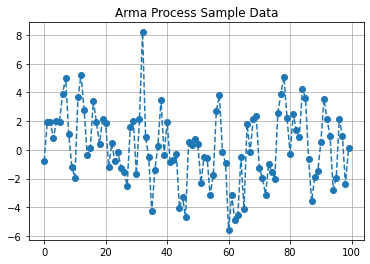

In [33]:
## Uncomment to plot the sample
plt.plot(sample, '--o')
plt.title('Arma Process Sample Data')
plt.grid();

[Back to top](#Index)

### Problem 3

**10 Points**


#### Computing the autocorrelation

Use the `sample` created above together with the `acf` function from statsmodels to compute the autocorrelation values for the sample.  Assign these values to `auto_corr` as an array below.  **Note**: Set `fft = True` in the acf function to avoid a warning.

<center>
    <img src = 'images/arma2.png'/>
</center>

In [34]:
auto_corr = acf(sample, fft=True)

# Answer check
print(auto_corr[:5])
print(type(auto_corr))

[ 1.          0.4551546   0.09938926 -0.05894484 -0.05016599]
<class 'numpy.ndarray'>


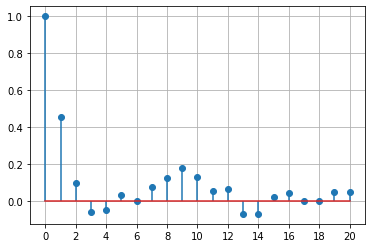

In [35]:
plt.stem(auto_corr)
plt.xticks(ticks=range(0, 21, 2))
plt.grid()
plt.show()

[Back to top](#Index)

### Problem 4

**10 Points**

#### Using `acf` to compute autocorrelation

Below, a dataset relating the volume of flow in the Nile river from statsmodels is loaded  and visualized.  Use the `acf` function from statsmodels to compute the autocorrelation values of the `volume` feature. Assign your results as an array to `nile_acf` below.  

Visualizing the autocorrelation data using the `plot_acf` function from statsmodels generates:

<center>
    <img src = 'images/ar4.png' />
</center>

Does this suggest the data is stationary?  Why or why not?

In [36]:
nile_df = nile.load_pandas().data
nile_df.head()

,year,volume
0,1871.0,1120.0
1,1872.0,1160.0
2,1873.0,963.0
3,1874.0,1210.0
4,1875.0,1160.0


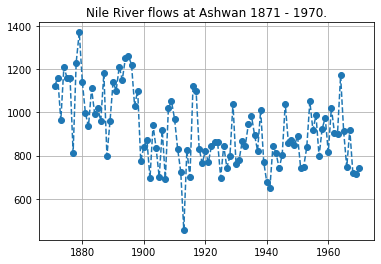

In [37]:
plt.plot(nile_df['year'], nile_df['volume'], '--o')
plt.title('Nile River flows at Ashwan 1871 - 1970.')
plt.grid();

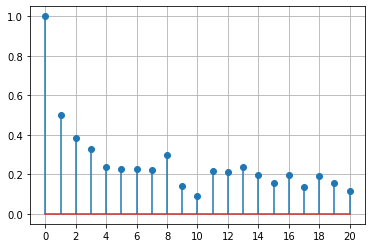

[1.         0.49840818 0.3845769  0.32786044 0.23919117]


In [38]:
### GRADED

nile_acf = acf(nile_df["volume"])

plt.stem(nile_acf)
plt.xticks(ticks=range(0, 21, 2))
plt.grid()
plt.show()

# Answer check
print(nile_acf[:5])

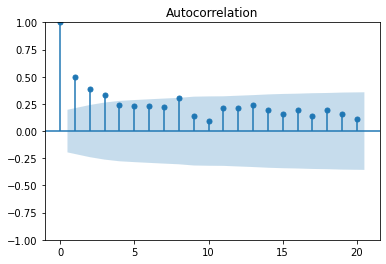

In [39]:
import statsmodels.graphics.tsaplots as tsaplots
(fix, ax) = plt.subplots()
tsaplots.plot_acf(nile_df["volume"], lags=20, ax=ax)
plt.show()

[Back to top](#Index)

### Problem 5

**10 Points**

#### Tesla and stationarity

Below, stock data from Tesla corporation are loaded from the beginning of the year 2020.  The Adjusted Closing price is plotted below.  You are to use the autocorrelation plots to determine which version of the data is stationary.  Assign one of the following strings to `ans5` below:

- `original`: the original adjusted closing price is stationary
- `first_diff`: the first difference of the adjusted closing price is stationary
- `neither`: neither the original time series or its first difference are stationary



In [40]:
tsla = pd.read_csv('data/tsla.csv', index_col='Date')
tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


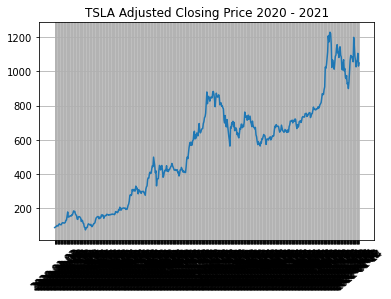

In [41]:
plt.plot(tsla['Adj Close'])
plt.grid()
plt.xticks(rotation = 40)
plt.title('TSLA Adjusted Closing Price 2020 - 2021');

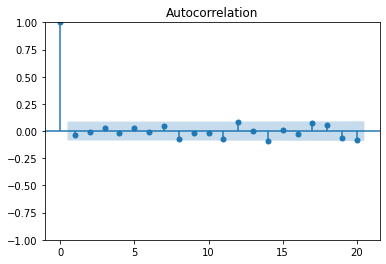

In [42]:
import statsmodels.graphics.tsaplots as tsaplots
(fix, ax) = plt.subplots()
tsaplots.plot_acf(tsla['Adj Close'].diff()[1:], lags=20, ax=ax)
plt.show()

In [43]:
### GRADED

ans5 = 'first_diff'


# Answer check
print(ans5)

first_diff
